In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!git clone https://github.com/rezashokrzad/Dataset.git

Cloning into 'Dataset'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
df = pd.read_csv('Ethereum_Prediction/data-ETHUSD-H1-MACD_train.csv')
df.head()
data = df.values[:, 9:].astype(np.float32)
#label
label = df.values[:, 2].astype(np.float32)

In [ ]:
k = 5 #supervising time
N = np.size(data , axis=0)
winSize = 20 #the size of sliding window
f = 5 #the number of features
X = np.zeros((0,winSize * f))
Ytr_c = np.zeros((0,1))

for i in tqdm(range(N - winSize - k)):
  X = np.concatenate((X  , data[i: i + winSize].flatten().reshape(1,-1)) , axis = 0)
  
  if label[i+winSize + k] / label[i+winSize] >= 1.01:
    Ytr_c = np.concatenate((Ytr_c , np.array(+1).reshape(-1,1)) , axis = 0)
  elif label[i+winSize + k] / label[i+winSize] <= 0.99:
    Ytr_c = np.concatenate((Ytr_c , np.array(-1).reshape(-1,1)) , axis = 0)
  else:
    Ytr_c = np.concatenate((Ytr_c , np.array(0).reshape(-1,1)) , axis = 0)


  0%|          | 0/29974 [00:00<?, ?it/s]

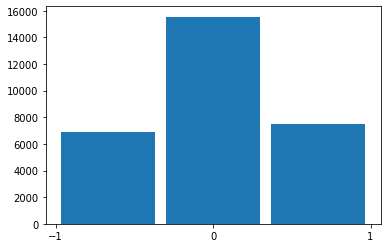

In [ ]:
plt.hist(Ytr_c, bins=3, rwidth=0.9)
plt.xticks([-1, 0, 1]);

In [ ]:
#same process for preparing test data
df = pd.read_csv('Dataset/data-ETHUSD-H1-MACD_test.csv')
df.head()
data = df.values[:, 9:].astype(np.float32)
label = df.values[:, 2].astype(np.float32)

Nts = np.size(data , axis=0)
Xts = np.zeros((0,winSize * f))
Yts_c = np.zeros((0,1))


for i in tqdm(range(Nts - winSize - k)):
  Xts = np.concatenate((Xts  , data[i: i + winSize].flatten().reshape(1,-1)) , axis = 0)
  
  if label[i+winSize + k] / label[i+winSize] >= 1.01:
    Yts_c = np.concatenate((Yts_c , np.array(+1).reshape(-1,1)) , axis = 0)
  elif label[i+winSize + k] / label[i+winSize] <= 0.99:
    Yts_c = np.concatenate((Yts_c , np.array(-1).reshape(-1,1)) , axis = 0)
  else:
    Yts_c = np.concatenate((Yts_c , np.array(0).reshape(-1,1)) , axis = 0)

Nts = np.size(Xts , axis=0)


  0%|          | 0/5625 [00:00<?, ?it/s]

In [ ]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X , Ytr_c[:,0])
Yp = tree.predict(Xts)

In [ ]:
print(accuracy_score(Yts_c , Yp))

0.424
